In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
spindles = pd.read_csv('spindles.csv', delimiter=';')
spindles.head()

,Date,HH,MM,SS,EOG Left[uV],EEG C3-A1[uV],EEG O1-A1[uV],EEG C4-A1[uV],EEG O2-A1[uV]
0,2016/03/08,1,27,"21,5","-7,12890625000002","2,05078124999998","23,6328125","3,02734374999998","18,45703125"
1,2016/03/08,1,27,"21,505","-6,64062500000002","-2,05078125000002","19,43359375","2,83203124999998","19,7265625"
2,2016/03/08,1,27,"21,51","-6,34765625000002","-1,85546875000002","17,28515625","4,10156249999998","19,3359375"
3,2016/03/08,1,27,"21,515","-7,32421875000002","-1,66015625000002","16,89453125","5,56640624999998","19,23828125"
4,2016/03/08,1,27,"21,52","-5,66406250000002","-0,488281250000017","16,796875","7,42187499999998","20,99609375"


In [85]:
spindles.columns

Index(['Date', 'HH', 'MM', 'SS', 'EOG Left[uV]', 'EEG C3-A1[uV]',
       'EEG O1-A1[uV]', 'EEG C4-A1[uV]', 'EEG O2-A1[uV]'],
      dtype='object')

In [86]:
wsleep = pd.read_csv('extrait_wSleepPage01.csv', delimiter=';')
wsleep

,Date,HH,MM,SS,EOG Left,EEG C3-A1,EEG O1-A1,EEG C4-A1,EEG O2-A1
0,08/03/2016,1,27,22,"0,78125","5,56640625","-12,40234375","0,9765625","13,76953125"
1,08/03/2016,1,27,"22,005","1,953125","4,78515625","-11,23046875","-0,09765625","17,08984375"
2,08/03/2016,1,27,"22,01","-1,67E-14","4,296875","-11,23046875","0,9765625","17,96875"
3,08/03/2016,1,27,"22,015","0,78125","4,78515625","-12,01171875","6,34765625","20,1171875"
4,08/03/2016,1,27,"22,02","0,29296875","4,1015625","-13,18359375","8,10546875","17,3828125"
...,...,...,...,...,...,...,...,...,...
248435,08/03/2016,1,48,"4,175","-22,4609375","-21,38671875","21,77734375","-21,484375","21,6796875"
248436,08/03/2016,1,48,"4,18","-20,703125","-21,97265625","18,26171875","-19,43359375","19,921875"
248437,08/03/2016,1,48,"4,185","-20,5078125","-21,09375","14,6484375","-17,7734375","18,9453125"
248438,08/03/2016,1,48,"4,19","-18,06640625","-14,94140625","12,109375","-9,765625","17,48046875"


In [87]:
spindles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           2598 non-null   object
 1   HH             2598 non-null   int64 
 2   MM             2598 non-null   int64 
 3   SS             2598 non-null   object
 4   EOG Left[uV]   2598 non-null   object
 5   EEG C3-A1[uV]  2598 non-null   object
 6   EEG O1-A1[uV]  2598 non-null   object
 7   EEG C4-A1[uV]  2598 non-null   object
 8   EEG O2-A1[uV]  2598 non-null   object
dtypes: int64(2), object(7)
memory usage: 182.8+ KB


In [88]:
wsleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248440 entries, 0 to 248439
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       248440 non-null  object
 1   HH         248440 non-null  int64 
 2   MM         248440 non-null  int64 
 3   SS         248440 non-null  object
 4   EOG Left   248440 non-null  object
 5   EEG C3-A1  248440 non-null  object
 6   EEG O1-A1  248440 non-null  object
 7   EEG C4-A1  248440 non-null  object
 8   EEG O2-A1  248440 non-null  object
dtypes: int64(2), object(7)
memory usage: 17.1+ MB


In [89]:
print ('Start time of this record is', wsleep['Date'][0], wsleep['HH'][0],":",wsleep['MM'][0],":",wsleep['SS'][0])
print ('End time of this record is', wsleep['Date'].iloc[-1], wsleep['HH'].iloc[-1],":",wsleep['MM'].iloc[-1],":",wsleep['SS'].iloc[-1])
print ('Duration of measurement is about',wsleep['MM'].iloc[-1]-wsleep['MM'][0],'minutes')

Start time of this record is 08/03/2016 1 : 27 : 22
End time of this record is 08/03/2016 1 : 48 : 4,195
Duration of measurement is about 21 minutes


In [90]:
wsleep['Time (s)'] = np.arange(0,248440*0.005,0.005)

In [91]:
# The useful features of df1 contain "EOG Left", "EEG C3-A1", "EEG O1-A1", "EEG C4-A1", "EEG O2-A1"
wsleep_new = wsleep[['Time (s)',"EOG Left", "EEG C3-A1", "EEG O1-A1", "EEG C4-A1", "EEG O2-A1"]]
wsleep_new

,Time (s),EOG Left,EEG C3-A1,EEG O1-A1,EEG C4-A1,EEG O2-A1
0,0.000,"0,78125","5,56640625","-12,40234375","0,9765625","13,76953125"
1,0.005,"1,953125","4,78515625","-11,23046875","-0,09765625","17,08984375"
2,0.010,"-1,67E-14","4,296875","-11,23046875","0,9765625","17,96875"
3,0.015,"0,78125","4,78515625","-12,01171875","6,34765625","20,1171875"
4,0.020,"0,29296875","4,1015625","-13,18359375","8,10546875","17,3828125"
...,...,...,...,...,...,...
248435,1242.175,"-22,4609375","-21,38671875","21,77734375","-21,484375","21,6796875"
248436,1242.180,"-20,703125","-21,97265625","18,26171875","-19,43359375","19,921875"
248437,1242.185,"-20,5078125","-21,09375","14,6484375","-17,7734375","18,9453125"
248438,1242.190,"-18,06640625","-14,94140625","12,109375","-9,765625","17,48046875"


In [92]:
features = ["EOG Left", "EEG C3-A1", "EEG O1-A1", "EEG C4-A1", "EEG O2-A1"]
for x in features:
    wsleep_new[x] = [x.replace(',', '.') for x in wsleep_new[x]]


wsleep_new = wsleep_new.astype('float')

<ipython-input-92-378c3b4bb992>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wsleep_new[x] = [x.replace(',', '.') for x in wsleep_new[x]]


In [93]:
wsleep_new.dtypes

,0
Time (s),float64
EOG Left,float64
EEG C3-A1,float64
EEG O1-A1,float64
EEG C4-A1,float64
EEG O2-A1,float64


In [94]:
print ('Start time of this record is', spindles['Date'][0], spindles['HH'][0],":",spindles['MM'][0],":",spindles['SS'][0])
print ('End time of this record is', spindles['Date'].iloc[-1], spindles['HH'].iloc[-1],":",spindles['MM'].iloc[-1],":",spindles['SS'].iloc[-1])
print ('Duration of measurement is about',spindles['MM'].iloc[-1]-spindles['MM'][0],'minutes')

Start time of this record is 2016/03/08 1 : 27 : 21,5
End time of this record is 2016/03/08 1 : 48 : 3,865
Duration of measurement is about 21 minutes


In [95]:
spindles['Time (s)'] = np.arange(0,2598*0.005,0.005)
spindles_new = spindles[['Time (s)','EOG Left[uV]', 'EEG C3-A1[uV]','EEG O1-A1[uV]', 'EEG C4-A1[uV]', 'EEG O2-A1[uV]']]
spindles_new.head()

,Time (s),EOG Left[uV],EEG C3-A1[uV],EEG O1-A1[uV],EEG C4-A1[uV],EEG O2-A1[uV]
0,0.000,"-7,12890625000002","2,05078124999998","23,6328125","3,02734374999998","18,45703125"
1,0.005,"-6,64062500000002","-2,05078125000002","19,43359375","2,83203124999998","19,7265625"
2,0.010,"-6,34765625000002","-1,85546875000002","17,28515625","4,10156249999998","19,3359375"
3,0.015,"-7,32421875000002","-1,66015625000002","16,89453125","5,56640624999998","19,23828125"
4,0.020,"-5,66406250000002","-0,488281250000017","16,796875","7,42187499999998","20,99609375"


In [96]:
features = ['EOG Left[uV]', 'EEG C3-A1[uV]','EEG O1-A1[uV]', 'EEG C4-A1[uV]', 'EEG O2-A1[uV]']
for x in features:
  spindles_new[x] = [x.replace(',', '.') for x in spindles_new[x]]


spindles_new = spindles_new.astype('float')
spindles_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time (s)       2598 non-null   float64
 1   EOG Left[uV]   2598 non-null   float64
 2   EEG C3-A1[uV]  2598 non-null   float64
 3   EEG O1-A1[uV]  2598 non-null   float64
 4   EEG C4-A1[uV]  2598 non-null   float64
 5   EEG O2-A1[uV]  2598 non-null   float64
dtypes: float64(6)
memory usage: 121.9 KB


<ipython-input-96-e9432da81e33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spindles_new[x] = [x.replace(',', '.') for x in spindles_new[x]]


In [97]:
spindles_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time (s)       2598 non-null   float64
 1   EOG Left[uV]   2598 non-null   float64
 2   EEG C3-A1[uV]  2598 non-null   float64
 3   EEG O1-A1[uV]  2598 non-null   float64
 4   EEG C4-A1[uV]  2598 non-null   float64
 5   EEG O2-A1[uV]  2598 non-null   float64
dtypes: float64(6)
memory usage: 121.9 KB


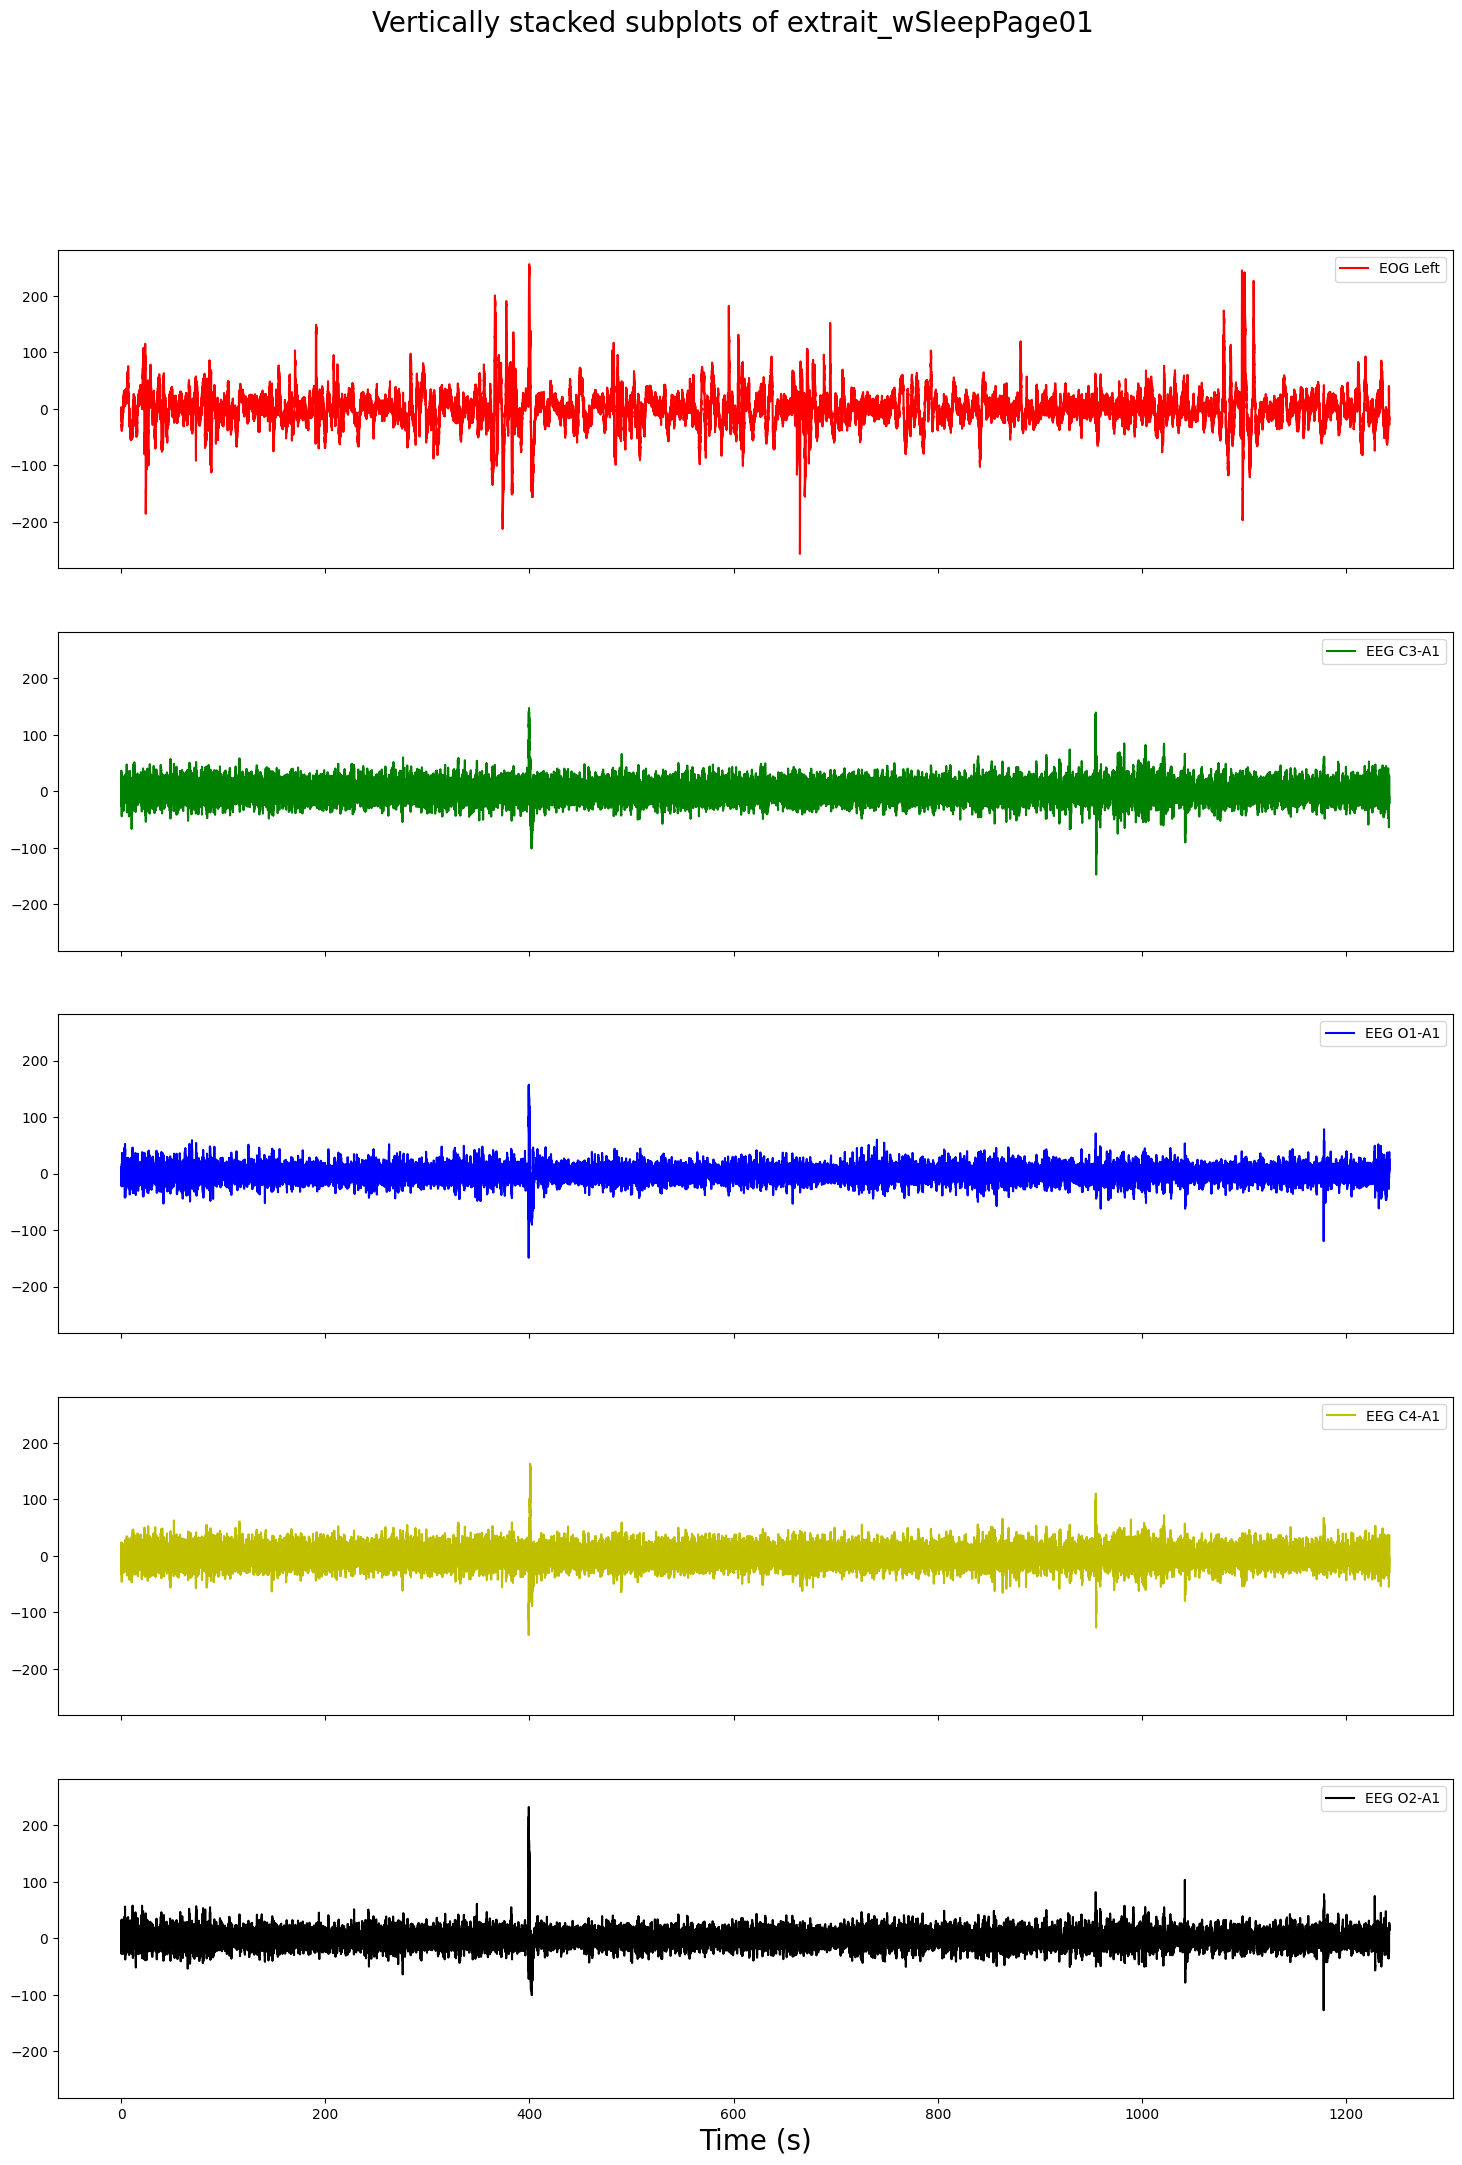

In [98]:
fig, axs = plt.subplots(5, sharex=True, sharey=True)
fig.set_size_inches(18, 24)
labels = ["EOG Left", "EEG C3-A1", "EEG O1-A1", 'EEG C4-A1', 'EEG O2-A1']
colors = ["r","g","b",'y',"k"]
fig.suptitle('Vertically stacked subplots of extrait_wSleepPage01', fontsize = 20)
# ---- loop over axes ----
for i,ax in enumerate(axs):
    axs[i].plot(wsleep_new['Time (s)'], wsleep_new[labels[i]],color=colors[i],label=labels[i])
    axs[i].legend(loc="upper right")

plt.xlabel('Time (s)', fontsize = 20)
plt.show()

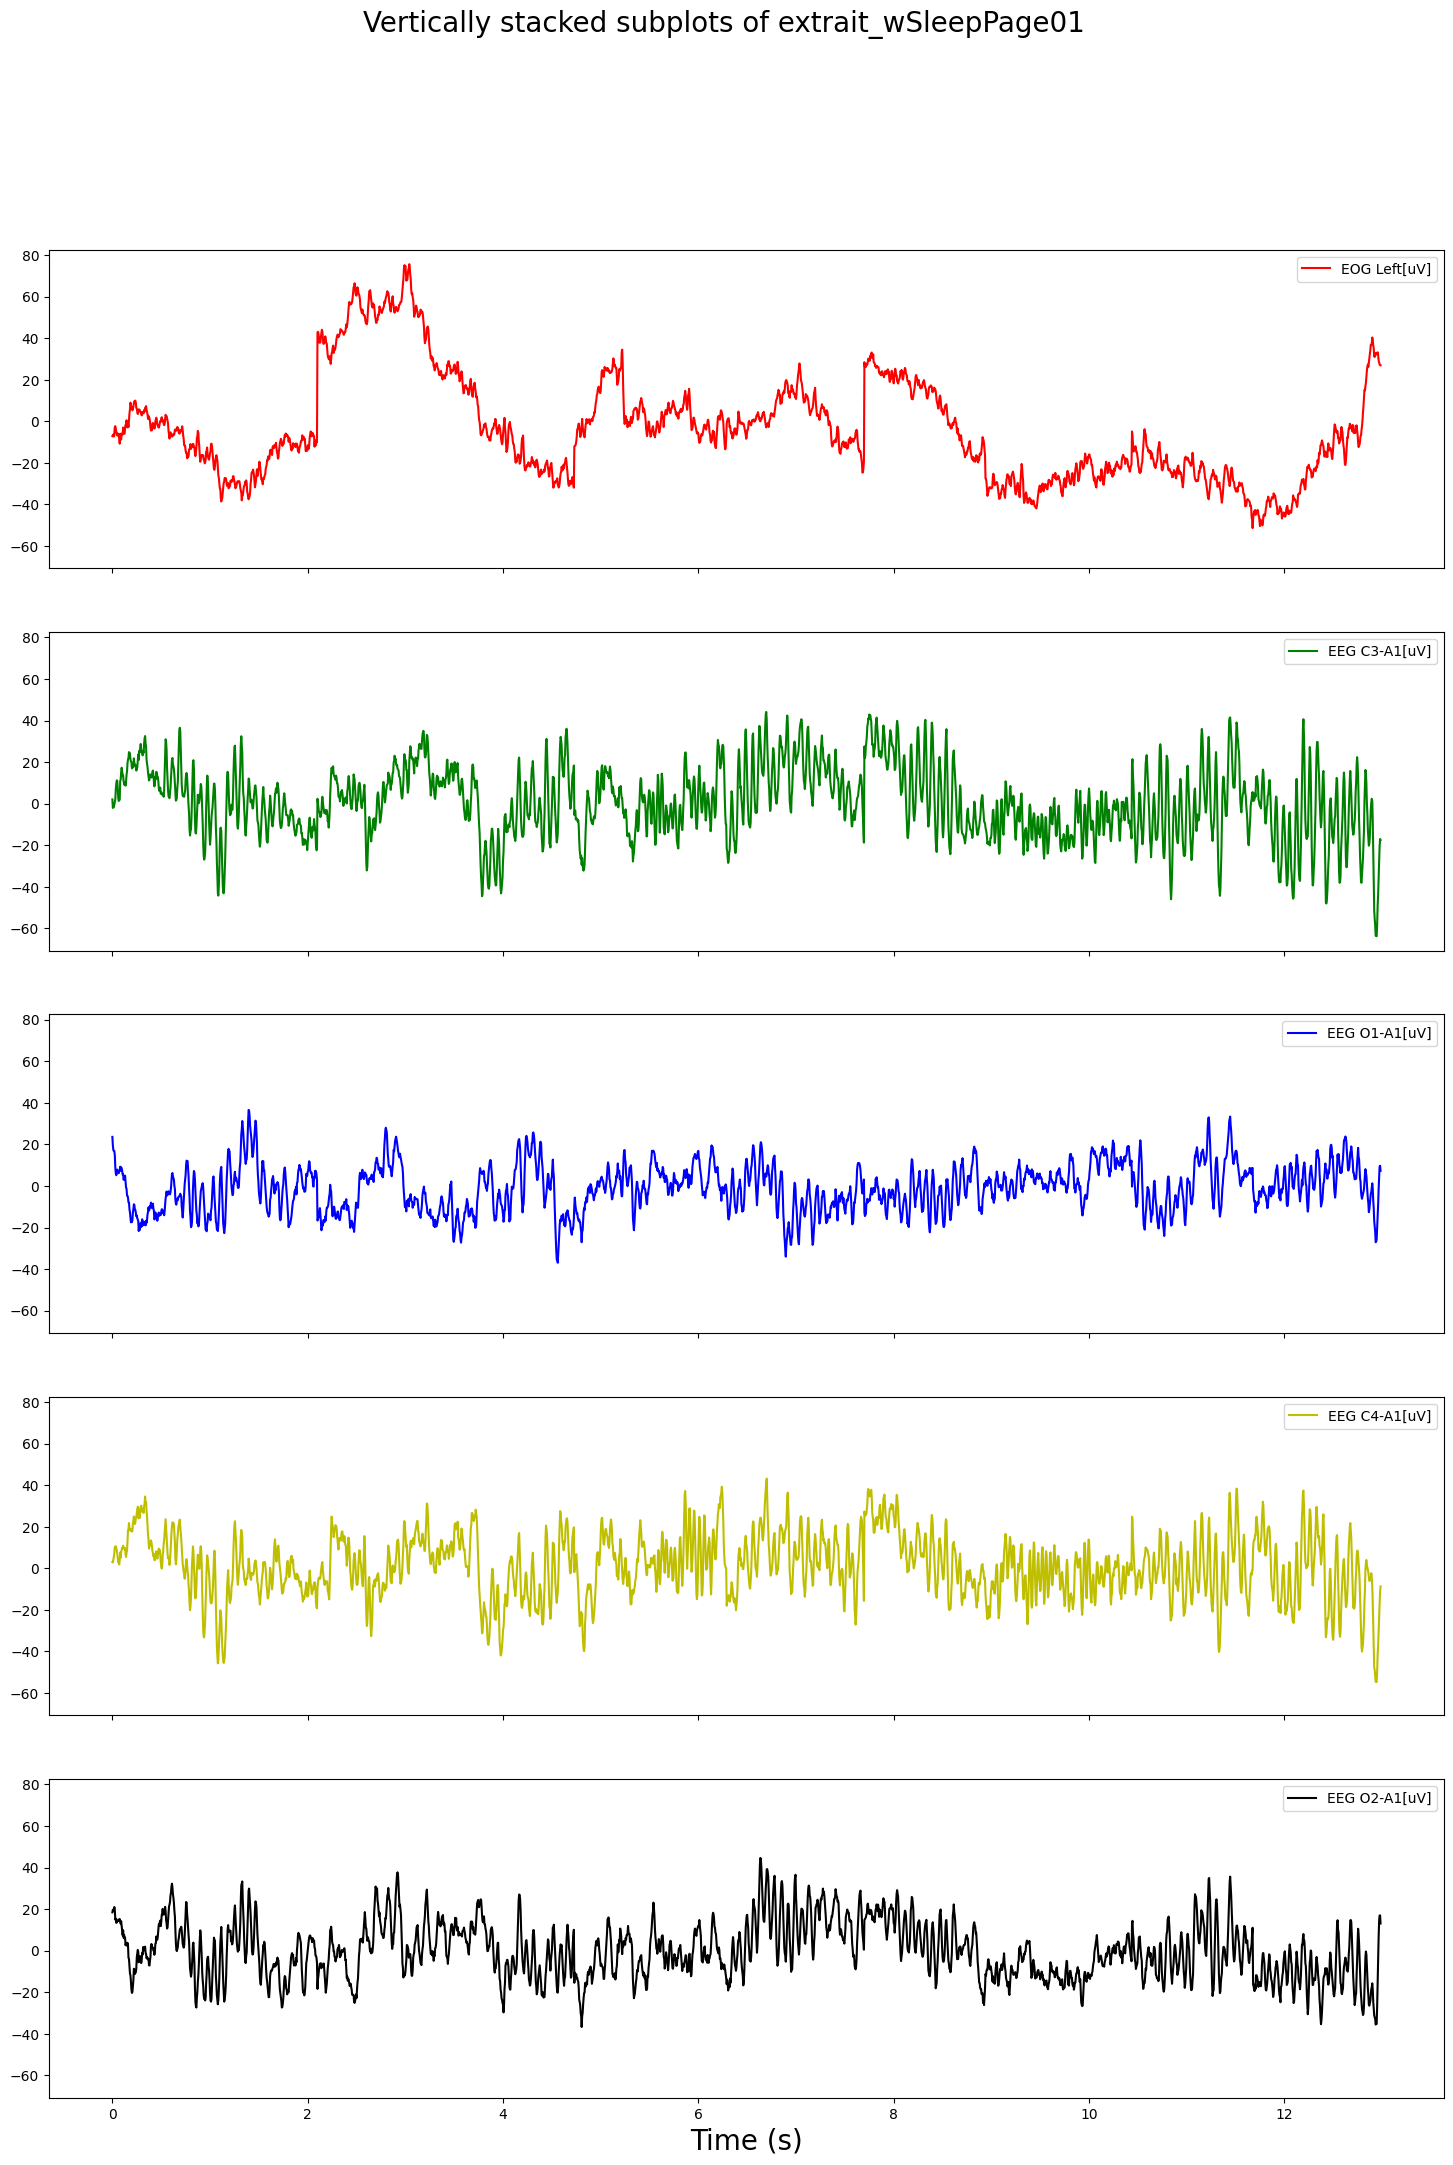

In [99]:
fig, axs = plt.subplots(5, sharex=True, sharey=True)
fig.set_size_inches(18, 24)
labels = ['EOG Left[uV]', 'EEG C3-A1[uV]','EEG O1-A1[uV]', 'EEG C4-A1[uV]', 'EEG O2-A1[uV]']
colors = ["r","g","b",'y',"k"]
fig.suptitle('Vertically stacked subplots of extrait_wSleepPage01', fontsize = 20)
# ---- loop over axes ----
for i,ax in enumerate(axs):
    axs[i].plot(spindles_new['Time (s)'], spindles_new[labels[i]],color=colors[i],label=labels[i])
    axs[i].legend(loc="upper right")

plt.xlabel('Time (s)', fontsize = 20)
plt.show()

In [102]:
from scipy.fft import fft

# Copy the data to a new DataFrame
FFT = spindles_new.copy()

# List of column names you want to apply FFT on
labels = ["EOG Left[uV]", "EEG C3-A1[uV]", "EEG O1-A1[uV]", 'EEG C4-A1[uV]', 'EEG O2-A1[uV]']

# Apply FFT to each column and update the DataFrame
for label in labels:
    FFT[label] = fft(FFT[label].to_numpy())

# Add the "Time (s)" column to FFT
FFT['Time (s)'] = spindles_new['Time (s)']

FFT.head()

,Time (s),EOG Left[uV],EEG C3-A1[uV],EEG O1-A1[uV],EEG C4-A1[uV],EEG O2-A1[uV]
0,0.000,-9545.019531- 0.000000j,1982.226562- 0.000000j,-2434.863281- 0.000000j,3068.457031- 0.000000j,-175.683594- 0.000000j
1,0.005,-10728.857945-22378.633105j,-6139.391879-1588.409372j,1877.049474+2803.573637j,-4430.651333+ 873.854596j,-5730.388398-1214.341343j
2,0.010,-3949.263207-13448.028878j,5037.863720-5854.287045j,-408.144692+3172.471824j,4306.933261-2389.363582j,2477.522911-5425.448377j
3,0.015,-3874.691530+14792.527651j,-1920.953464+7022.590421j,-1885.006239-2488.867328j,-1642.682767+4339.393212j,-3062.633660+6873.030104j
4,0.020,10076.177322+ 6872.100878j,167.609746-4820.759057j,348.212047+3705.124487j,930.658289- 571.666589j,480.177608-5989.248193j


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


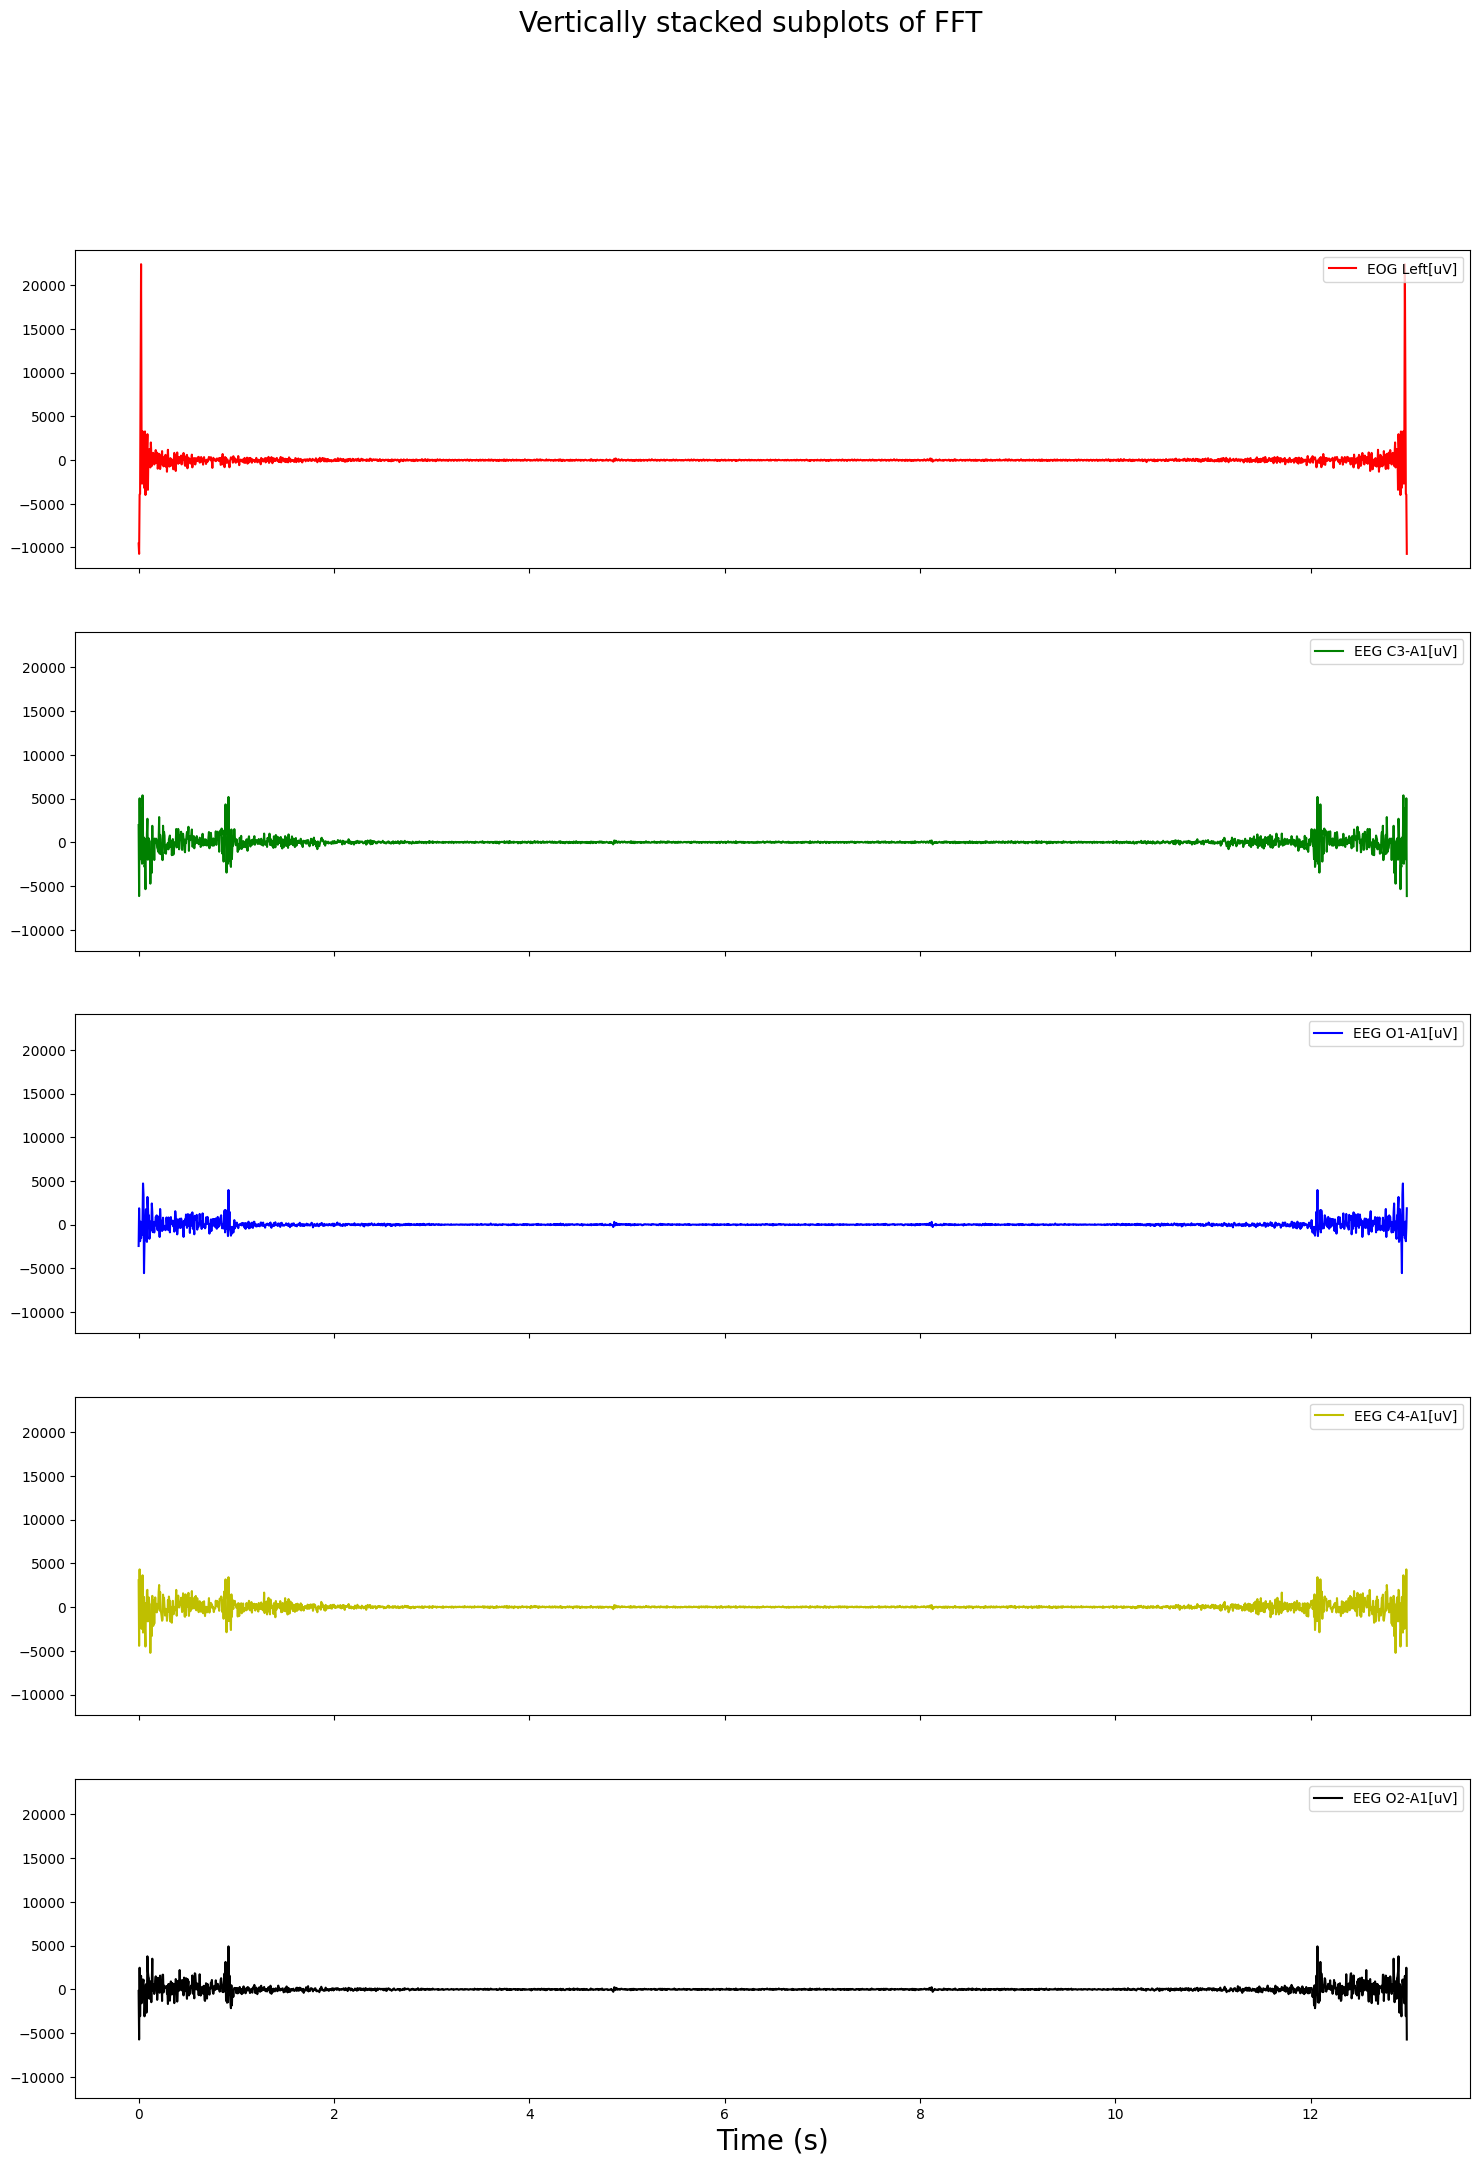

In [103]:
# plot these FFT features in the same graph with stack plot
fig, axs = plt.subplots(5, sharex=True, sharey=True)
fig.set_size_inches(18, 24)
labels = ["EOG Left[uV]", "EEG C3-A1[uV]", "EEG O1-A1[uV]", 'EEG C4-A1[uV]', 'EEG O2-A1[uV]']
colors = ["r","g","b",'y',"k"]
fig.suptitle('Vertically stacked subplots of FFT', fontsize=20)
# ---- loop over axes ----
for i,ax in enumerate(axs):
  axs[i].plot(FFT['Time (s)'], FFT[labels[i]],color=colors[i],label=labels[i])
  axs[i].legend(loc="upper right")

plt.xlabel('Time (s)', fontsize = 20)
plt.show()